In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
plt.style.use('fivethirtyeight')
data = pd.read_csv('Titanic-Dataset.csv')
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


___
# Sex

In [5]:
data['Sex'].astype('str')

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

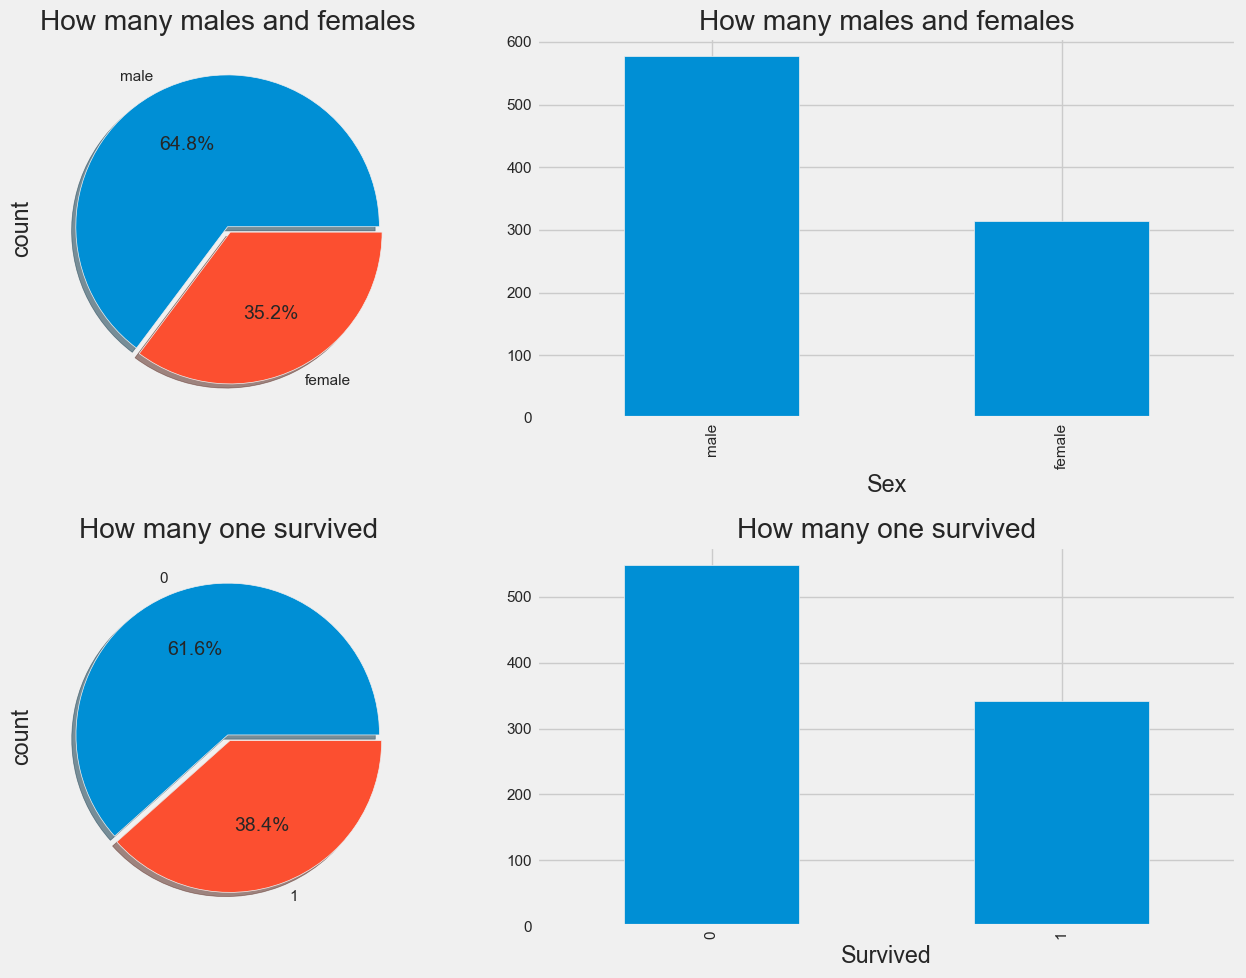

In [6]:
f,ax = plt.subplots(2,2,figsize=(14,10))
data['Sex'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=[0.01,0.03],ax=ax[0,0])
ax[0,0].set_title("How many males and females")
data['Sex'].value_counts().plot.bar(ax=ax[0,1])
ax[0,1].set_title("How many males and females")
data['Survived'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=[0.01,0.03],ax=ax[1,0])
ax[1,0].set_title("How many one survived")
data['Survived'].value_counts().plot.bar(ax=ax[1,1])
ax[1,1].set_title("How many one survived")
plt.tight_layout()
plt.show()

In [7]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


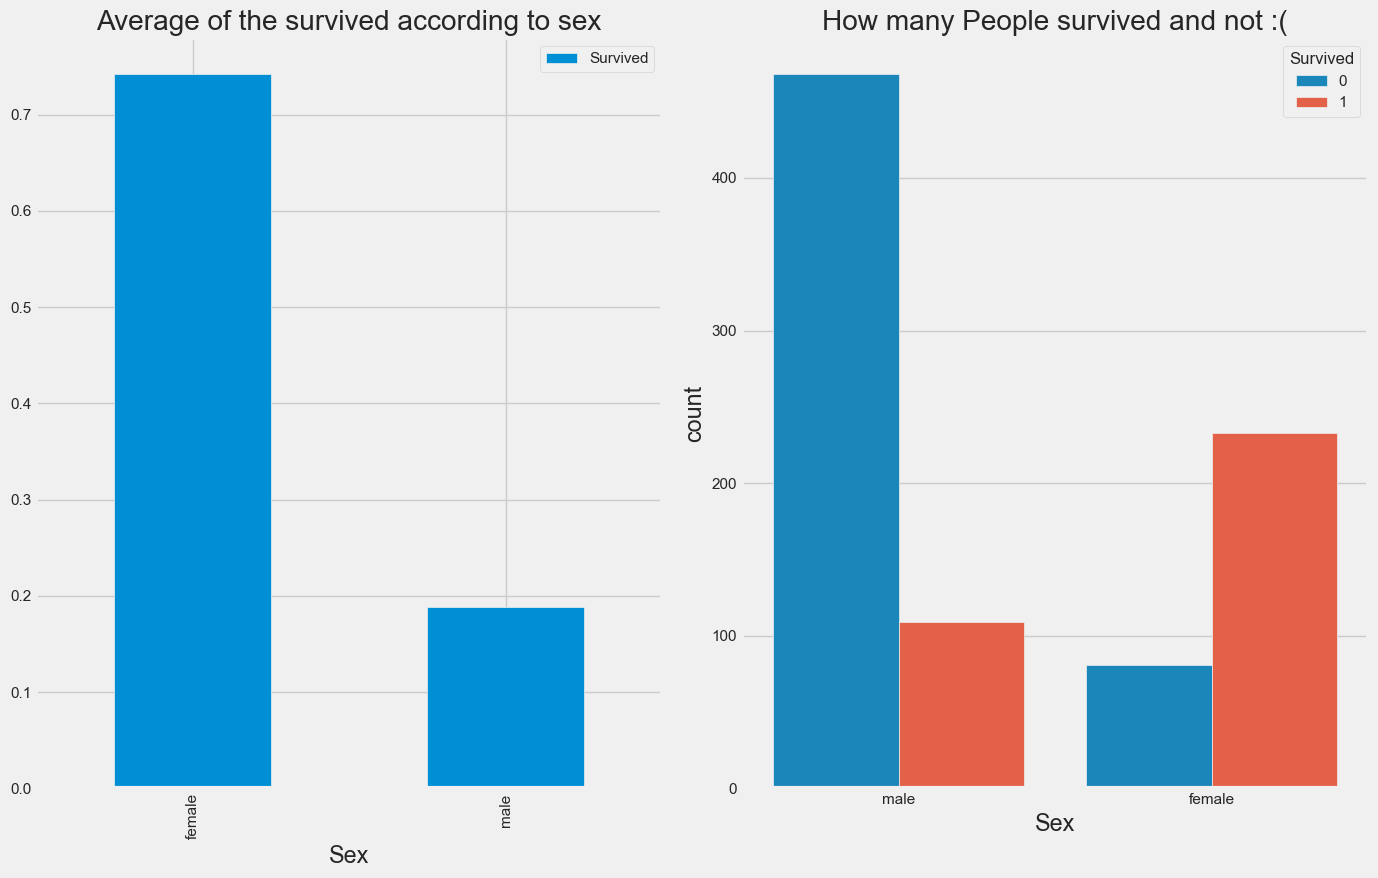

In [8]:
f,ax =plt.subplots(1,2,figsize=(14,9))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title("Average of the survived according to sex")
sns.countplot(data=data,x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title("How many People survived and not :(")
plt.tight_layout()
plt.show()

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


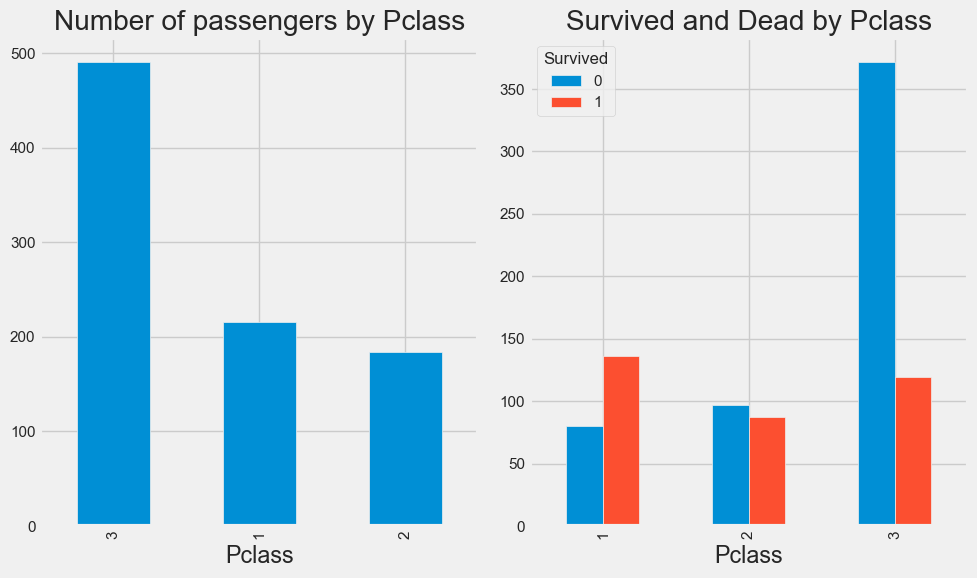

In [10]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of passengers by Pclass")
pd.crosstab(data['Pclass'],data['Survived']).plot.bar(ax=ax[1])
ax[1].set_title("Survived and Dead by Pclass")
plt.tight_layout()
plt.show()

In [11]:
pd.crosstab([data['Sex'],data['Survived']],[data['Pclass']],margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

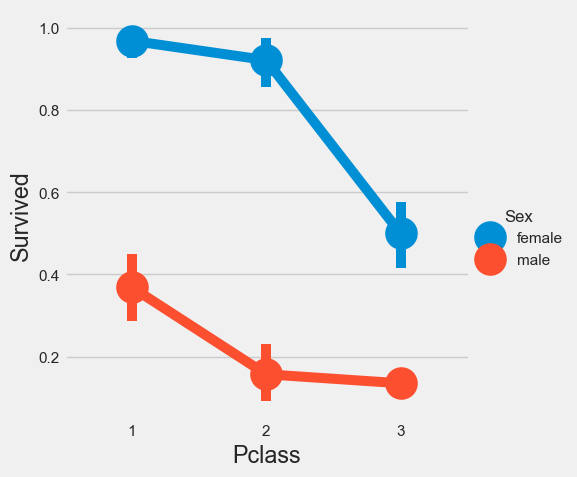

In [12]:
sns.catplot(x='Pclass',y='Survived',hue="Sex",data=data,kind='point')

---
# Age

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.Age.isnull().sum()

177

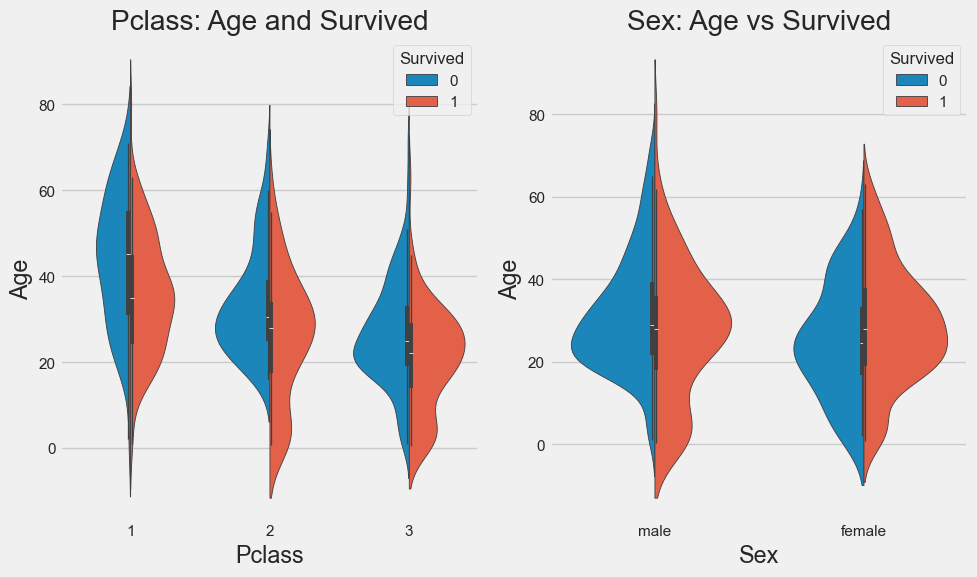

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.violinplot(x='Pclass',y='Age',hue='Survived',split=True,data=data,ax=ax[0])
ax[0].set_title('Pclass: Age and Survived')
sns.violinplot(x='Sex',y='Age',hue='Survived',split=True,data=data,ax=ax[1])
ax[1].set_title("Sex: Age vs Survived")
plt.tight_layout()
plt.show()

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data['initial']=0

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
for i in data:
    data['initial']=data['Name'].str.extract("([A-z]+)\.")

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/d9/zdm7d1ds3psb_8zpkc1nrz_r0000gn/T/ipykernel_31506/4039190676.py:2: SyntaxWarning: invalid escape sequence '\.'
  data['initial']=data['Name'].str.extract("([A-z]+)\.")


In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
data['initial'].value_counts()

initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [22]:
data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

/var/folders/d9/zdm7d1ds3psb_8zpkc1nrz_r0000gn/T/ipykernel_31506/620966391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [23]:
data['initial'].value_counts()

initial
Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: count, dtype: int64

In [24]:
pd.crosstab(data['initial'],data['Sex'])

Sex,female,male
initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [25]:
data.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

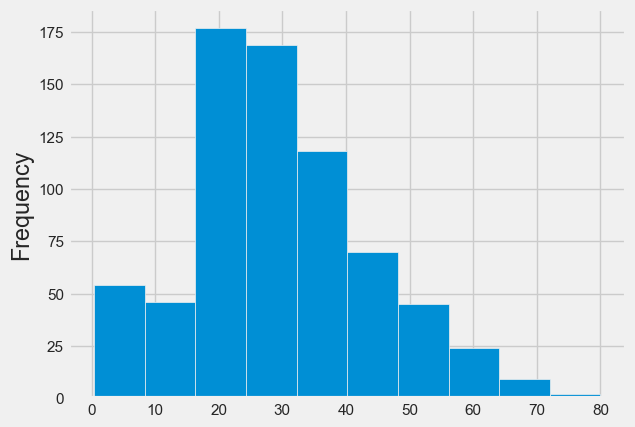

In [26]:
data.Age.plot.hist()

___
## Fill na in Age Column

In [27]:
data.loc[(data['initial']=='Master') & (data['Age'].isnull()),'Age'] = 5
data.loc[(data['initial']=='Miss') & (data['Age'].isnull()),'Age'] = 22
data.loc[(data['initial']=='Mr') & (data['Age'].isnull()),'Age'] = 33
data.loc[(data['initial']=='Mrs') & (data['Age'].isnull()),'Age'] = 36
data.loc[(data['initial']=='Other') & (data['Age'].isnull()),'Age'] = 46

In [28]:
data['Age'].isnull().sum()

0

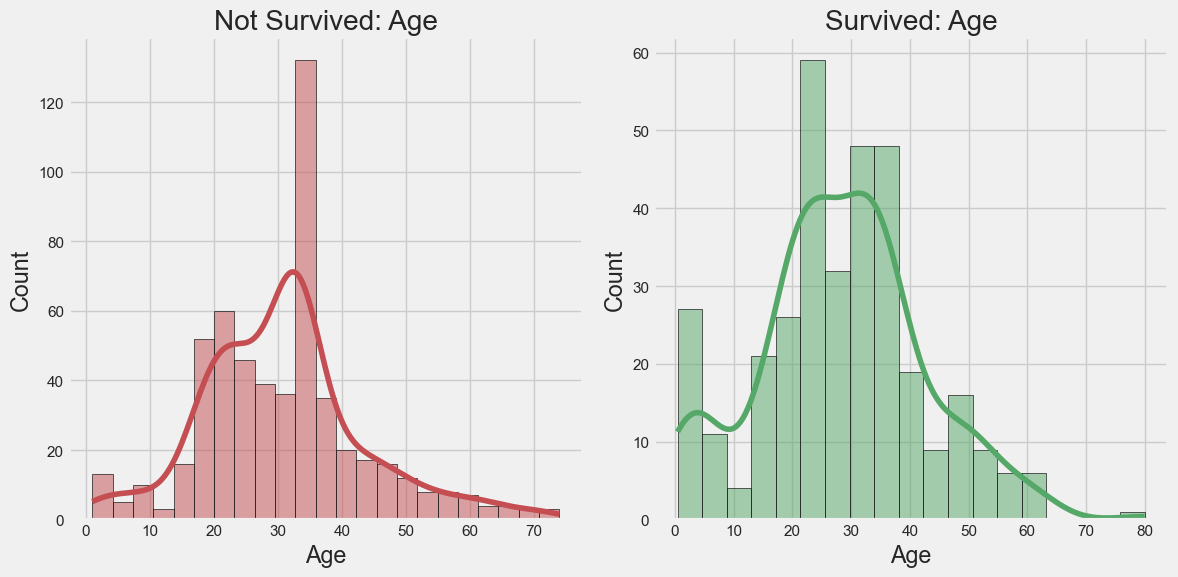

In [29]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.histplot(data[data['Survived']==0]['Age'],kde=True,edgecolor='k',ax=ax[0],color='r')
ax[0].set_title('Not Survived: Age')
sns.histplot(data[data['Survived']==1]['Age'],kde=True,edgecolor='k',ax=ax[1],color='g')
ax[1].set_title('Survived: Age')
plt.tight_layout()
plt.show()

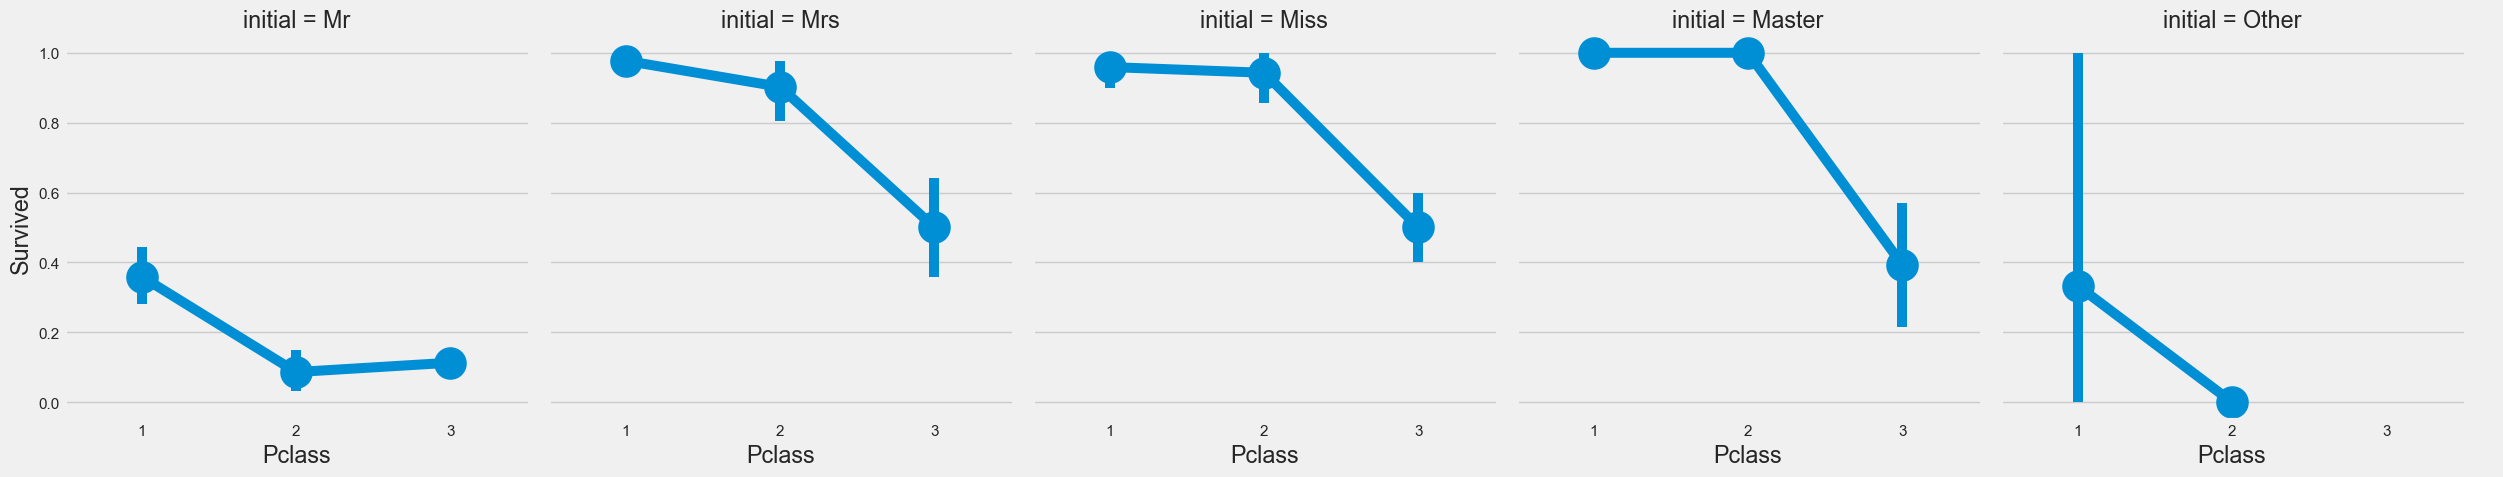

In [30]:
sns.catplot(x='Pclass',y='Survived',col='initial',data=data,kind='point')

-----
# Embarked - Nominal data

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [32]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
data['Embarked'].isnull().sum()

2

In [34]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

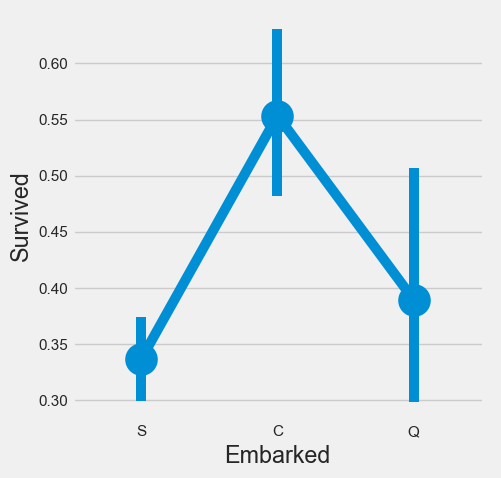

In [35]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')

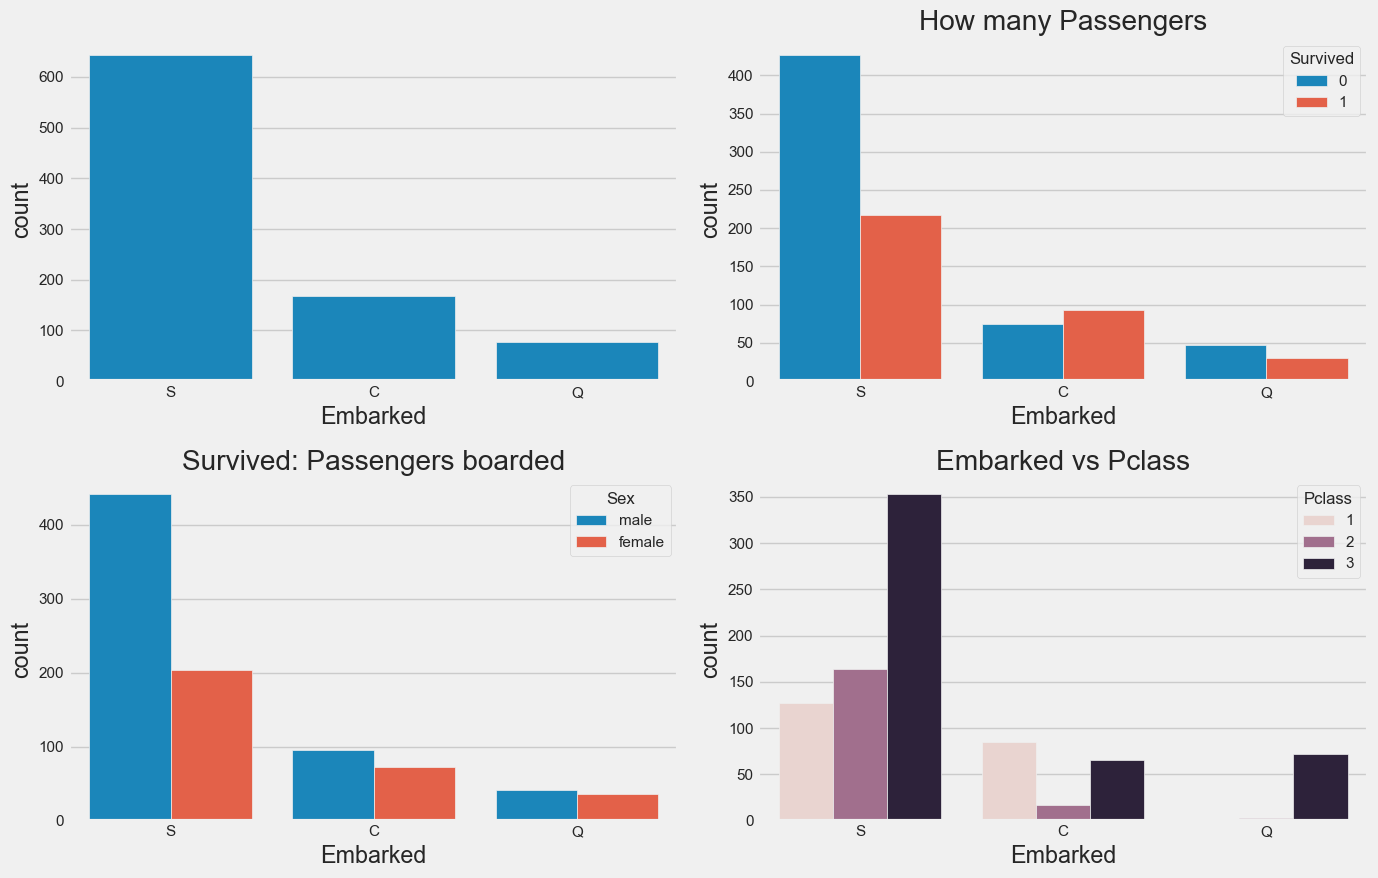

In [36]:
f,ax = plt.subplots(2,2,figsize=(14,9))
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[0,1])
ax[0,1].set_title("Embarked:Survived")
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,1].set_title("How many Passengers")
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[1,0])
ax[1,0].set_title('Survived: Passengers boarded')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")
plt.tight_layout()
plt.show()


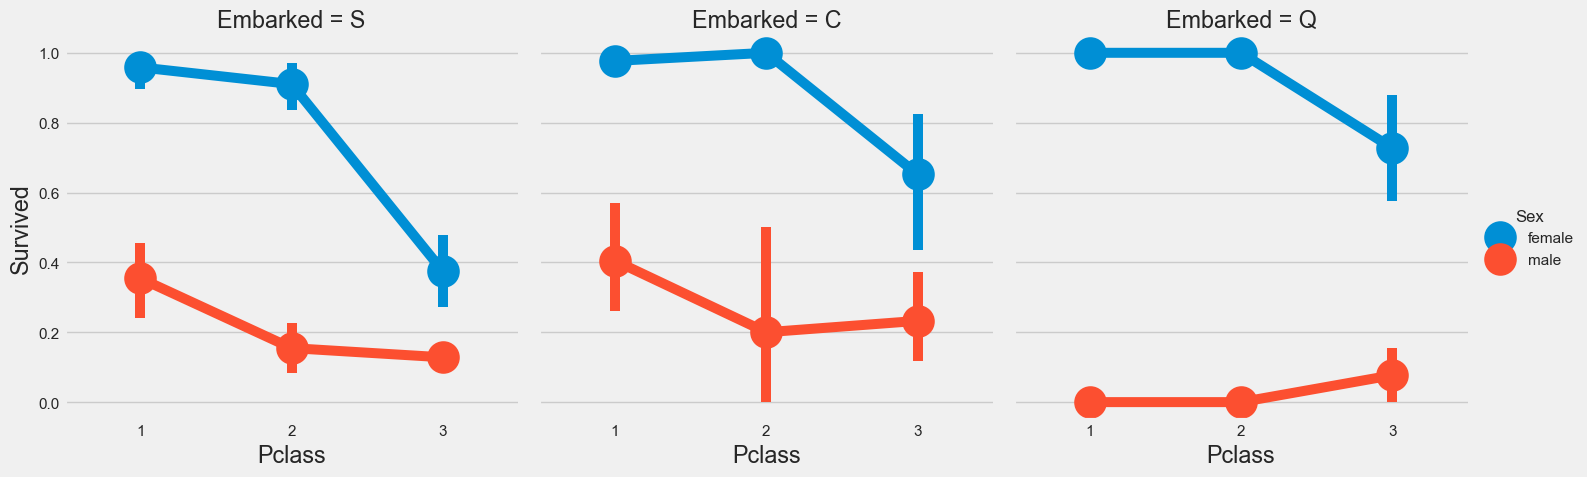

In [37]:
sns.catplot(x="Pclass",y='Survived',hue='Sex',col='Embarked',data=data,kind='point')

In [38]:
data['Embarked'].isnull().sum()

2

In [39]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [40]:
data['Embarked'].fillna('S',inplace=True)

/var/folders/d9/zdm7d1ds3psb_8zpkc1nrz_r0000gn/T/ipykernel_31506/1306493021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S',inplace=True)


In [41]:
data['Embarked'].isnull().sum()

0

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


----
# Parch

In [43]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [44]:
data["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='Survived'>

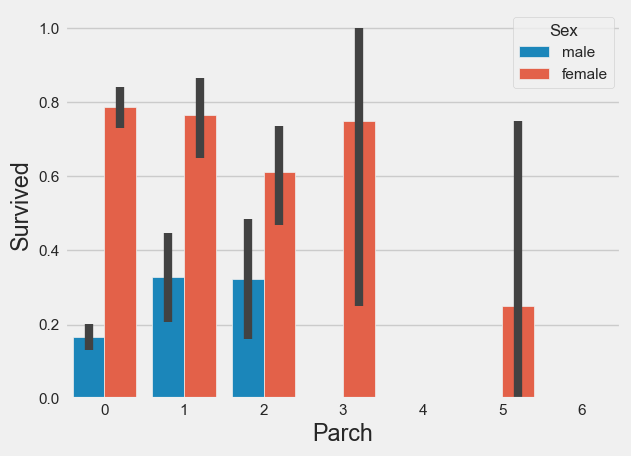

In [45]:
sns.barplot(data=data,x='Parch',y='Survived',hue='Sex')

-----
# Sibsp col


In [46]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [47]:
pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Figure size 640x480 with 0 Axes>

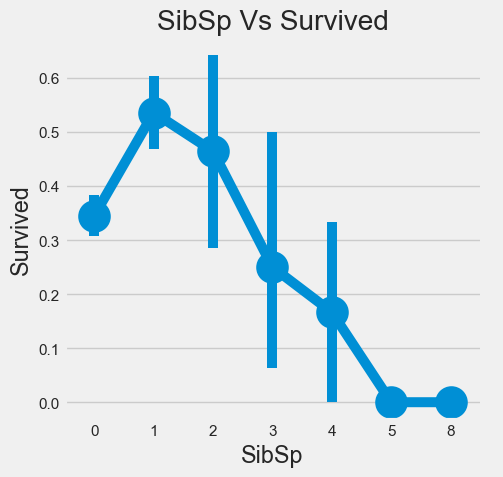

In [48]:
plt.figure()
sns.catplot(x='SibSp',y='Survived',data=data,kind='point')
plt.title("SibSp Vs Survived")
plt.tight_layout()
plt.show()

_____
# Fare - Continous Data

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [50]:
data['Fare'].max(),data['Fare'].min(),data['Fare'].mean(),data['Fare'].median()

(512.3292, 0.0, 32.204207968574636, 14.4542)

<Axes: xlabel='Fare', ylabel='Count'>

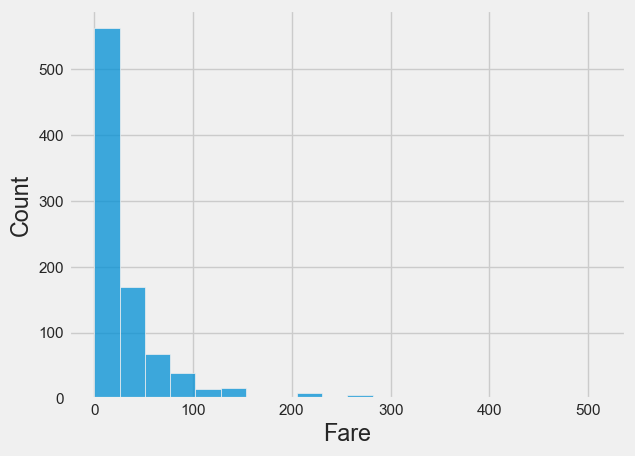

In [51]:
sns.histplot(data['Fare'],bins=20)

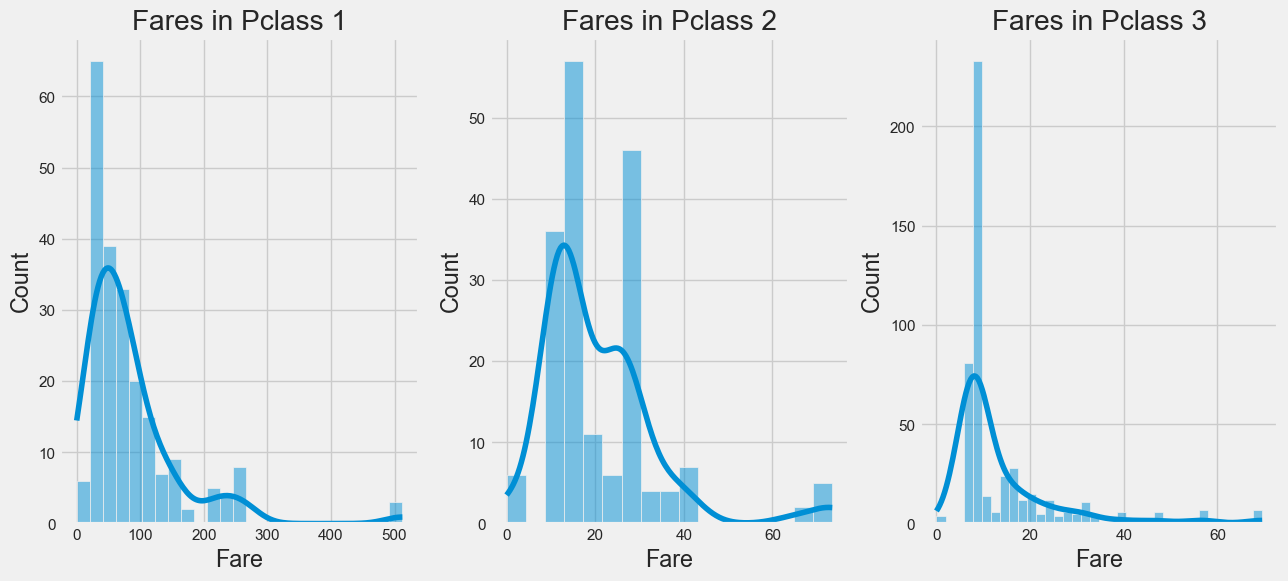

In [52]:
f,ax = plt.subplots(1,3,figsize=(14,6))
sns.histplot(data[data['Pclass']==1]['Fare'],ax=ax[0],kde=True)
sns.histplot(data[data['Pclass']==2]['Fare'],ax=ax[1],kde=True)
sns.histplot(data[data['Pclass']==3]['Fare'],ax=ax[2],kde=True)
ax[0].set_title("Fares in Pclass 1")
ax[1].set_title("Fares in Pclass 2")
ax[2].set_title("Fares in Pclass 3")
plt.show()

-----
# Correlation

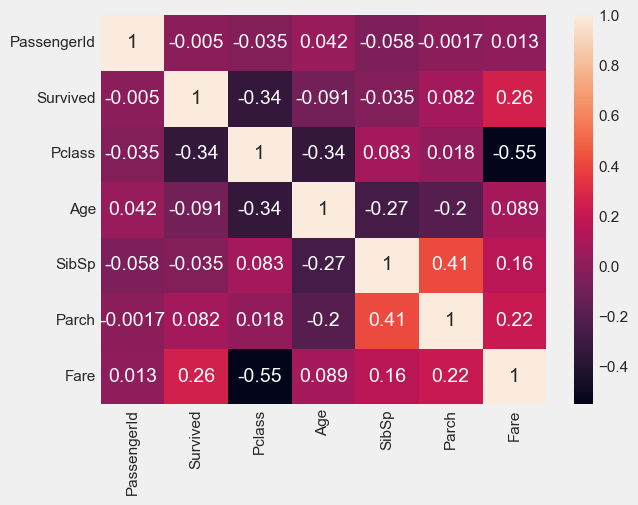

In [53]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

In [54]:
data['Age_cat']=0
data.loc[data["Age"]<=16,'Age_cat'] = 0
data.loc[(data["Age"]>16)&(data['Age']<=32),'Age_cat'] = 1
data.loc[(data["Age"]>32)&(data['Age']<=50),'Age_cat'] = 2
data.loc[(data["Age"]>50)&(data['Age']<=70),'Age_cat'] = 3
data.loc[data["Age"]>70,'Age_cat'] = 4

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


<Axes: xlabel='Age_cat'>

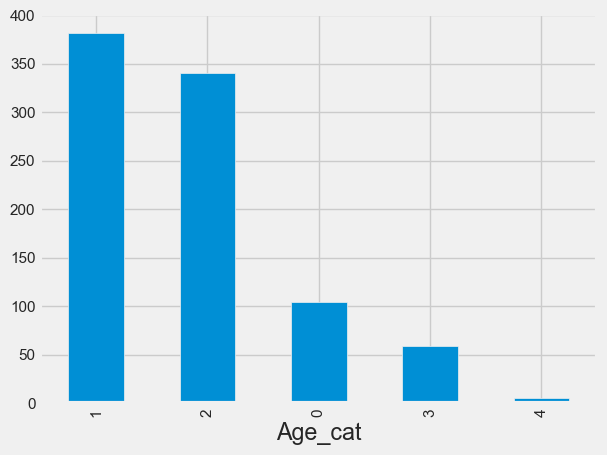

In [56]:
data['Age_cat'].value_counts().plot.bar()

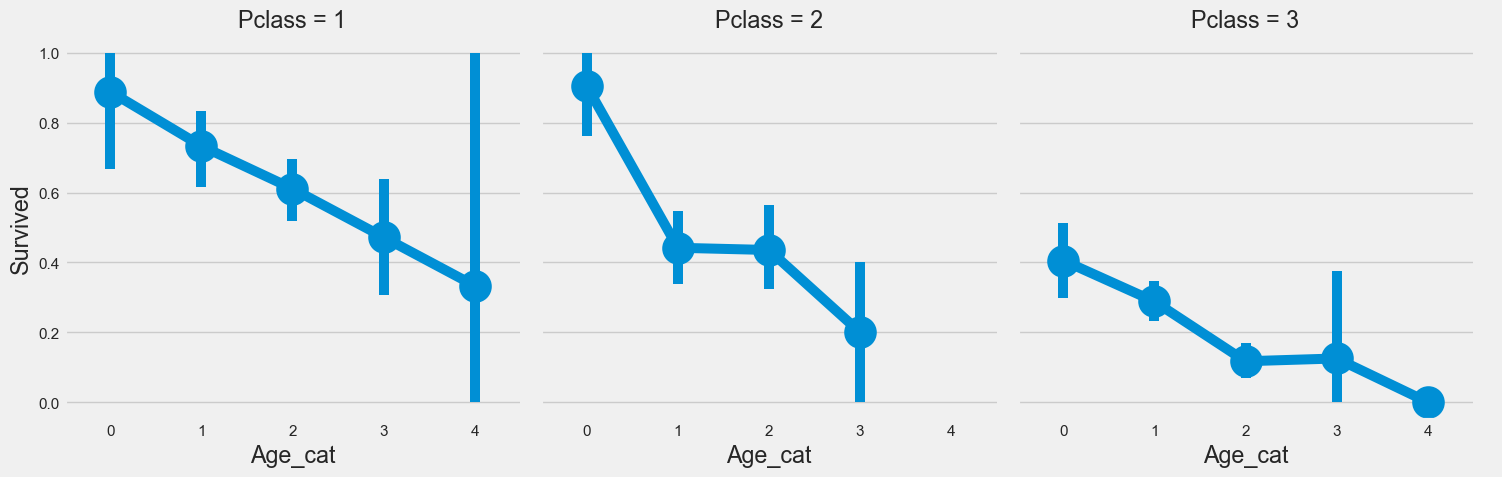

In [57]:
sns.catplot(x='Age_cat',y='Survived',col='Pclass',data=data,kind='point')